In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [94]:
import os
import numpy as np
import pandas as pd
import cv2
import random
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import zipfile
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
#Warnings
import warnings


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks.callbacks import EarlyStopping
from keras.callbacks.callbacks import ModelCheckpoint

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")

Configuring VGG Net

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.applications import VGG16

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

Loading Dataset from Drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Loading and Extracting Data

In [7]:
BASE_PATH = '/content'

def extract_dataset(path):
  #Extracting the dataset from the zip file

  zip_ref = zipfile.ZipFile(path, 'r')
  zip_ref.extractall(BASE_PATH)
  zip_ref.close()

In [8]:
extract_dataset('/content/drive/My Drive/Research_Dataset/normalize.zip')

Making Directories for Train, Test and Validation

In [9]:
os.listdir('/content/normalize')

['lung_n', 'lung_aca', 'lung_scc']

In [10]:
dir_class = [dirs for dirs in os.listdir('/content/normalize')]

In [11]:
dir_class

['lung_n', 'lung_aca', 'lung_scc']

In [12]:
directories = ['Train', 'Test','Validation']
directories

['Train', 'Test', 'Validation']

In [13]:
def make_dirs(dir_lst):
  for j in range(len(directories)):
    if not(os.path.exists(directories[j])):
      os.mkdir(directories[j])
      for i in range(len(dir_class)):
        if not(os.path.exists(directories[j]+'/'+dir_class[i])):
          os.mkdir(directories[j]+'/'+dir_class[i])
        else:
          print('Sub directory exists')
    else:
      print('Directory exist')

In [14]:
make_dirs(directories)

Fetching the images and distributing in Train , Test and Validation


In [15]:
path ='/content/normalize/'

In [17]:
for i in range(len(dir_class)):
  if dir_class[i] == 'lung_n':
    lung_n_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  elif dir_class[i] == 'lung_aca':
    lung_aca_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  else:
    lung_scc_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  

4998
5000
5000


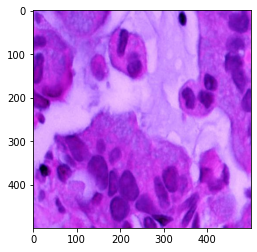

In [18]:
img_aca = cv2.cvtColor(cv2.imread(path+'lung_aca/'+lung_aca_lst[30]),cv2.COLOR_BGR2RGB)
plt.imshow(img_aca)

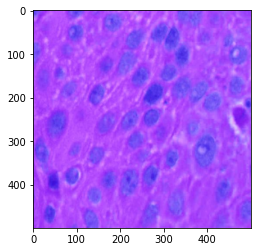

In [19]:
img_scc = cv2.cvtColor(cv2.imread(path+'lung_scc/'+lung_scc_lst[30]),cv2.COLOR_BGR2RGB)
plt.imshow(img_scc)

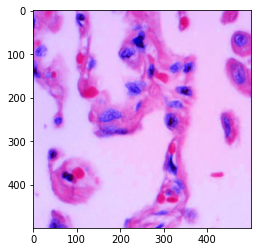

In [20]:
img_n = cv2.cvtColor(cv2.imread(path+'lung_n/'+lung_n_lst[30]),cv2.COLOR_BGR2RGB)
plt.imshow(img_n)

Splitting of the data

In [21]:
train_split = 0.70
val_split = 0.20


In [22]:
def splitter(path,dirs,lst_img):
  random.seed(123)
  train_indx = int(len(lst_img)*train_split)
  train_lst = random.sample(lst_img,train_indx)
  #print(train_lst)
  #print(len(train_lst))

  val_indx = int(len(train_lst)*val_split)
  val_lst = random.sample(train_lst,val_indx)

  
  #Moving to Validation Folder
  print(len(val_lst))
  print(val_lst)
  for f in val_lst:
    shutil.move(path+dirs+'/'+f,'Validation/'+dirs)

  #Moving to Training Folder
  train_lst = list(set(train_lst) - set(val_lst))
  print(train_lst)
  print(len(train_lst))
  for f in train_lst:
    shutil.move(path+dirs+'/'+f,'Train/'+dirs)
  




In [23]:
def train_val_set_split(type_list):
  for a in tqdm_notebook(type_list):
    if a == 'lung_aca':
      print('lung_aca')
      splitter(path,a,lung_aca_lst)
    elif a == 'lung_scc':
      print('lung_scc')
      splitter(path,a,lung_scc_lst)
    else:
      print('lung_n')
      splitter(path,a,lung_n_lst)


In [24]:
train_val_set_split(dir_class)

lung_n
699
['lungn3068.jpeg', 'lungn4471.jpeg', 'lungn3858.jpeg', 'lungn3760.jpeg', 'lungn112.jpeg', 'lungn3399.jpeg', 'lungn2870.jpeg', 'lungn3309.jpeg', 'lungn1126.jpeg', 'lungn4768.jpeg', 'lungn1134.jpeg', 'lungn1805.jpeg', 'lungn4242.jpeg', 'lungn4627.jpeg', 'lungn4416.jpeg', 'lungn1509.jpeg', 'lungn1306.jpeg', 'lungn1290.jpeg', 'lungn3815.jpeg', 'lungn1580.jpeg', 'lungn4063.jpeg', 'lungn3063.jpeg', 'lungn3770.jpeg', 'lungn1498.jpeg', 'lungn735.jpeg', 'lungn1464.jpeg', 'lungn609.jpeg', 'lungn950.jpeg', 'lungn2532.jpeg', 'lungn2163.jpeg', 'lungn505.jpeg', 'lungn867.jpeg', 'lungn4904.jpeg', 'lungn2438.jpeg', 'lungn2074.jpeg', 'lungn4698.jpeg', 'lungn3420.jpeg', 'lungn1407.jpeg', 'lungn3794.jpeg', 'lungn256.jpeg', 'lungn4393.jpeg', 'lungn3317.jpeg', 'lungn879.jpeg', 'lungn1584.jpeg', 'lungn4918.jpeg', 'lungn2714.jpeg', 'lungn4977.jpeg', 'lungn35.jpeg', 'lungn608.jpeg', 'lungn3101.jpeg', 'lungn2095.jpeg', 'lungn4444.jpeg', 'lungn1886.jpeg', 'lungn3541.jpeg', 'lungn436.jpeg', 'lungn3257

In [33]:
def fileTransfer(path,dirs):
  for f in tqdm_notebook(os.listdir(path+dirs)):
    shutil.move(path+dirs+'/'+f,'Test/'+dirs)

In [34]:
def test_set(dir_lst):
  for dirs in dir_lst:
    if dirs =='lung_aca':
      print('lung_aca')
      fileTransfer(path,'lung_aca')
    elif dirs =='lung_scc':
      print('lung_scc')
      fileTransfer(path,'lung_scc')
    else:
      print('lung_n')
      fileTransfer(path,'lung_n')

In [35]:
test_set(dir_class)

lung_n



lung_aca



lung_scc


Creating Data Generator Objects 

In [114]:
image_size = 224
#Test Data Generator 
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('Test/',target_size=(image_size, image_size))

#Train Data Generator 

train_datagen = ImageDataGenerator(zca_epsilon=1e-06,
                                   featurewise_std_normalization=True,
                                   featurewise_center=True,
                                   zoom_range=0.2,
                                   rescale=1./255,
                                   )
train_generator = train_datagen.flow_from_directory('Train/',
                                                    target_size=(image_size, image_size),
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    class_mode="categorical",
                                                    shuffle=True,)
#Validation Data Generator

validation_generator = test_datagen.flow_from_directory('Validation/',
                                                        target_size=(image_size, image_size),
                                                        batch_size=32,
                                                        color_mode="rgb",
                                                        class_mode="categorical",)

Found 4500 images belonging to 3 classes.
Found 8399 images belonging to 3 classes.
Found 2099 images belonging to 3 classes.


In [99]:
modelvgg = VGG16()

In [100]:
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [101]:
model = Sequential()

In [102]:
for i in range(len(modelvgg.layers)-1):
  model.add(modelvgg.layers[i])


In [103]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [104]:
for layer in model.layers:
  layer.trainable = False

In [105]:
model.add(Dense(3,activation='softmax'))

In [106]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [107]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['categorical_accuracy'])

In [108]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('./drive/My Drive/rp_vgg16_model.h5', monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

In [109]:
train_step = train_generator.n//train_generator.batch_size
val_step = validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_step,
                                validation_data=validation_generator,
                                validation_steps=val_step,
                                epochs=10,callbacks=[es, mc])

Epoch 1/10
262/262 [==============================] - 123s 470ms/step - loss: 0.2574 - categorical_accuracy: 0.9228 - val_loss: 0.0725 - val_categorical_accuracy: 0.9913

Epoch 00001: val_categorical_accuracy improved from -inf to 0.99135, saving model to ./drive/My Drive/rp_vgg16_model.h5
Epoch 2/10
262/262 [==============================] - 121s 462ms/step - loss: 0.0689 - categorical_accuracy: 0.9871 - val_loss: 0.0486 - val_categorical_accuracy: 0.9903

Epoch 00002: val_categorical_accuracy did not improve from 0.99135
Epoch 3/10
262/262 [==============================] - 118s 451ms/step - loss: 0.0412 - categorical_accuracy: 0.9941 - val_loss: 0.0062 - val_categorical_accuracy: 0.9952

Epoch 00003: val_categorical_accuracy improved from 0.99135 to 0.99516, saving model to ./drive/My Drive/rp_vgg16_model.h5
Epoch 4/10
262/262 [==============================] - 119s 454ms/step - loss: 0.0287 - categorical_accuracy: 0.9962 - val_loss: 0.0135 - val_categorical_accuracy: 0.9956

Epoch 

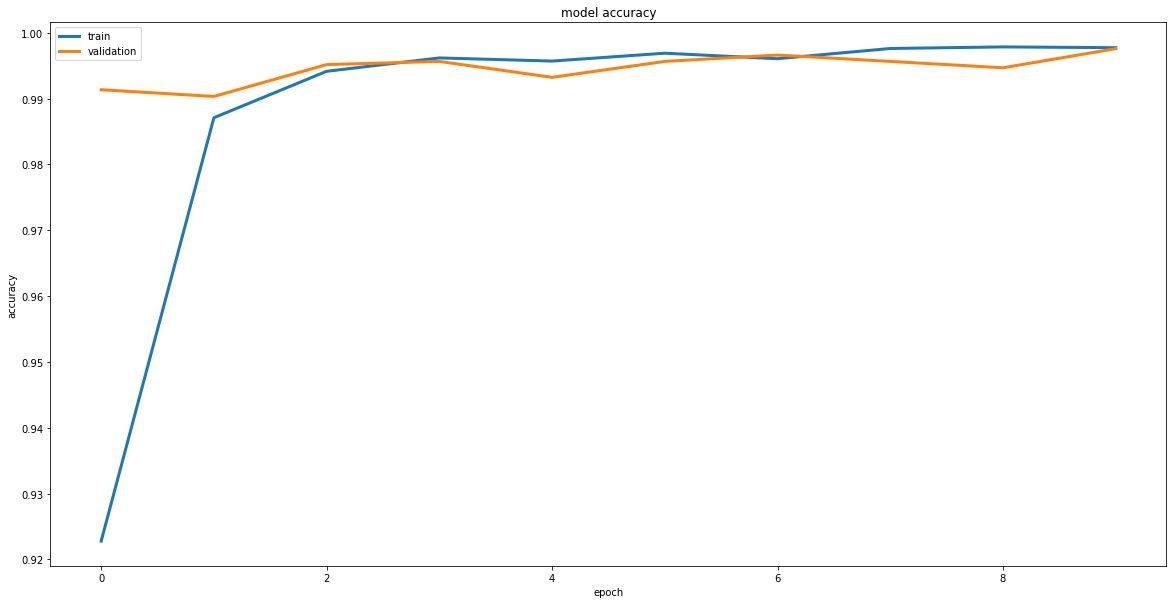

In [110]:
plt.figure(figsize=(20,10))
plt.plot(history.history['categorical_accuracy'],linewidth=3.0)
plt.plot(history.history['val_categorical_accuracy'],linewidth=3.0)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

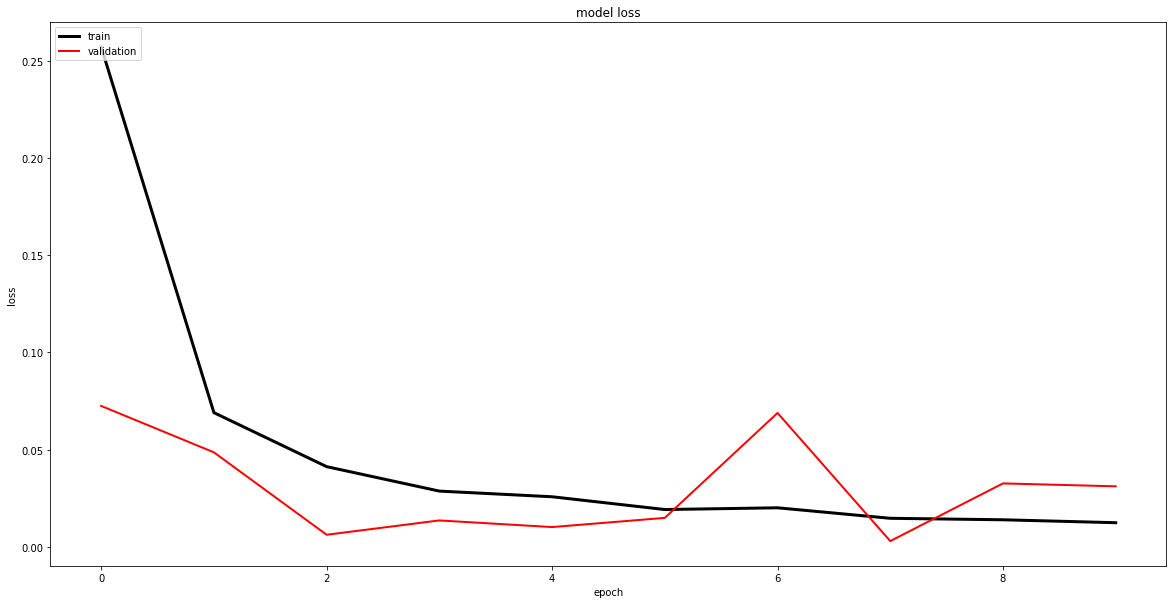

In [111]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], color='black',linewidth=3.0)
plt.plot(history.history['val_loss'],color='red',linewidth=2.0)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [112]:
train_pred = model.evaluate_generator(train_generator,verbose=1)
print("Training Categorical Accuracy :"+str(train_pred[1])+"Training loss : "+str(train_pred[0]))

263/263 [==============================] - 109s 413ms/step
Training Categorical Accuracy :0.998214066028595Training loss : 0.0011615571565926075


In [115]:
test_pred = model.evaluate_generator(test_generator,verbose=1)
print("Testing Categorical Accuracy :"+str(test_pred[1])+"Testing loss : "+str(test_pred[0]))

141/141 [==============================] - 22s 154ms/step
Testing Categorical Accuracy :0.9995555281639099Testing loss : 0.0337032824754715
